In [32]:
# Install Chrome
!apt-get update
!apt-get install -y google-chrome-stable

# Install chromedriver-autoinstaller
!pip install chromedriver-autoinstaller

import chromedriver_autoinstaller

# Automatically install the correct ChromeDriver version
chromedriver_autoinstaller.install()

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import json
import pandas as pd
import time
from bs4 import BeautifulSoup

# Configure Chrome options for headless execution
options = Options()
options.add_argument('--headless') # Run Chrome in headless mode (without a UI)
options.add_argument('--no-sandbox') # Bypass OS security model, required in some environments
options.add_argument('--disable-dev-shm-usage') # Overcome limited resource problems

driver = webdriver.Chrome(options=options)

driver.get("https://www.bbc.com/weather/293397")

# Add a more robust wait to ensure the page content is loaded
try:
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "main#main-content")) # Wait for a main content element
    )
except Exception as e:
    print(f"Error waiting for page content: {e}")

html_content = driver.page_source
driver.quit()

soup = BeautifulSoup(html_content, 'html.parser')

# Try to find the __NEXT_DATA__ script tag, if it exists
json_script = soup.find('script', {'id': '__NEXT_DATA__'}) or soup.find('script', type='application/json')

data = None
if json_script:
    try:
        json_text = json_script.string
        if json_text:
            data = json.loads(json_text)
            print("JSON data loaded successfully from script tag.")
        else:
            print("Found script tag but it's empty.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from script tag: {e}")
else:
    print("__NEXT_DATA__ script tag or any application/json script tag not found. Inspecting HTML snippet.")
    # Print a snippet of the HTML content for debugging purposes if data not found
    print("--- HTML Snippet (first 2000 characters) ---")
    print(html_content[:2000])
    print("----------------------------------------------")

# If data is still None, you might need to manually inspect the HTML for other ways to get the data
# For now, let's assume `data` might be available for further processing if found.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 3,917 B in 2s (1,948 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state informa

In [42]:
forecast = (
    data["data"]["forecasts"]
)

forecast_data = []

for i, day in enumerate(forecast):
    if i == 0: # Print report for the first day to inspect its structure
        print("\n--- Inspecting day['summary']['report'] structure ---")
        print(f"Content of day['summary']['report']: {day['summary']['report']}")
        print(f"Keys in day['summary']['report']: {day['summary']['report'].keys()}")
        print("----------------------------------------------------")

    forecast_data.append({
        "date": day["detailed"]["issueDate"],
        "max_temp_c": day["summary"]["report"]["maxTempC"],
        "min_temp_c": day["summary"]["report"]["minTempC"],
        "description": day["summary"]["report"]["enhancedWeatherDescription"]
    })


--- Inspecting day['summary']['report'] structure ---
Content of day['summary']['report']: {'enhancedWeatherDescription': 'Light rain showers and a gentle breeze', 'gustSpeedKph': 29, 'gustSpeedMph': 18, 'localDate': '2025-12-30', 'lowermaxTemperatureC': None, 'lowermaxTemperatureF': None, 'lowerminTemperatureC': None, 'lowerminTemperatureF': None, 'maxTempC': 19, 'maxTempF': 66, 'minTempC': 13, 'minTempF': 56, 'mostLikelyHighTemperatureC': 19, 'mostLikelyHighTemperatureF': 67, 'mostLikelyLowTemperatureC': 12, 'mostLikelyLowTemperatureF': 54, 'pollenIndex': None, 'pollenIndexBand': None, 'pollenIndexIconText': None, 'pollenIndexText': None, 'pollutionIndex': None, 'pollutionIndexBand': None, 'pollutionIndexIconText': None, 'pollutionIndexText': None, 'precipitationProbabilityInPercent': 77, 'precipitationProbabilityText': 'High chance of precipitation', 'sunrise': '06:41', 'sunset': '16:46', 'uppermaxTemperatureC': None, 'uppermaxTemperatureF': None, 'upperminTemperatureC': None, 'upp

In [43]:
df = pd.DataFrame(forecast_data)
print(df)


                         date  max_temp_c  min_temp_c  \
0   2025-12-29T23:00:00+02:00          19          13   
1   2025-12-29T23:00:00+02:00          20          13   
2   2025-12-29T23:00:00+02:00          18          13   
3   2025-12-29T23:00:00+02:00          17          10   
4   2025-12-29T23:00:00+02:00          17           7   
5   2025-12-29T23:00:00+02:00          19           9   
6   2025-12-29T23:00:00+02:00          20           8   
7   2025-12-29T23:00:00+02:00          20           9   
8   2025-12-30T10:02:28+02:00          20          10   
9   2025-12-30T10:02:28+02:00          20          12   
10  2025-12-30T10:02:28+02:00          19          13   
11  2025-12-30T10:02:28+02:00          18          11   
12  2025-12-30T10:02:28+02:00          18          12   
13  2025-12-30T10:02:28+02:00          19          12   

                                 description  
0     Light rain showers and a gentle breeze  
1         Sunny intervals and a fresh breeze  
2  

In [44]:
print("Average max temperature:", df["max_temp_c"].mean())
print("Average min temperature:", df["min_temp_c"].mean())

print("Hottest day:")
print(df.loc[df["max_temp_c"].idxmax()])

Average max temperature: 18.857142857142858
Average min temperature: 10.857142857142858
Hottest day:
date                    2025-12-29T23:00:00+02:00
max_temp_c                                     20
min_temp_c                                     13
description    Sunny intervals and a fresh breeze
Name: 1, dtype: object


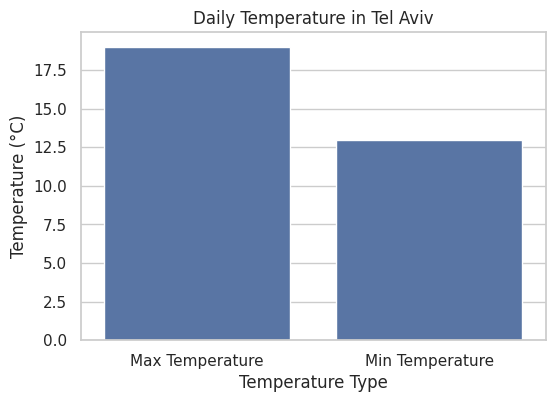

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(
    x=["Max Temperature", "Min Temperature"],
    y=[df["max_temp_c"].iloc[0], df["min_temp_c"].iloc[0]]
)

plt.title("Daily Temperature in Tel Aviv")
plt.ylabel("Temperature (°C)")
plt.xlabel("Temperature Type")
plt.show()


## Methology
In this project, weather data for Tel Aviv was collected from the BBC Weather website.
Since the website uses dynamic JavaScript-based content loading, Selenium WebDriver was used to access the webpage and retrieve the embedded weather data.
The extracted data was structured into a Pandas DataFrame, which allowed for efficient data handling and analysis.

## Data Analysis
Basic data analysis was performed on the collected dataset.
The maximum and minimum daily temperatures were analyzed, and the average daily temperature was calculated based on these values.
Since the dataset contains data for only one day, total values and trend analysis over time were not applicable.

## Data Visualization
A bar chart was created using Matplotlib and Seaborn to compare the maximum and minimum temperatures for the selected day.
The visualization is clearly labeled with a title and axis labels, making it easy to interpret the temperature difference within the day.

## Insights and Observation
The visualization shows a noticeable difference between the maximum and minimum temperatures, indicating a clear daily temperature range.
This suggests that weather conditions in Tel Aviv can vary significantly throughout the day.
Although the dataset is limited to a single day, the analysis provides a clear snapshot of daily weather conditions.

## Conclusion
This project demonstrates the process of web scraping dynamic content, data structuring, basic data analysis, and visualization.
The results highlight how even a small dataset can provide meaningful insights when analyzed and presented correctly.